In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
##retrieve dara
dat = pd.read_csv("/Users/ksk/Desktop/data.csv",skiprows=[0,1,2,4], encoding='shift_jis')

In [4]:
dat

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2
0,2012/1/1,7.5,8,1
1,2012/1/2,6.3,8,1
2,2012/1/3,5.8,8,1
3,2012/1/4,4.4,8,1
4,2012/1/5,4.2,8,1
5,2012/1/6,6.3,8,1
6,2012/1/7,5.5,8,1
7,2012/1/8,5.5,8,1
8,2012/1/9,7.4,8,1
9,2012/1/10,7.3,8,1


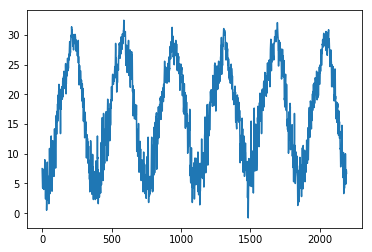

In [6]:
# 平均気温の抽出と可視化
temp = dat['平均気温(℃)']
temp.plot()
plt.show()

In [22]:
#データセットを訓練用とテスト用に分割
train_x = temp[:1461]
test_x = temp[1461:]

In [23]:
#Numpy配列へ変換
train_x = np.array(train_x)
test_x = np.array(test_x)

In [26]:
#説明変数の件数
ATTR_SIZE = 180

tmp = []
train_X =[]
#データを1個ずつスライドさせて訓練データを作成
for i in range(0, len(train_x)-ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE])
train_X = np.array(tmp)

#データフレーム形式で訓練データを表示
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,7.5,6.3,5.8,4.4,4.2,6.3,5.5,5.5,7.4,7.3,...,24.0,23.9,20.1,22.2,21.8,23.1,23.9,24.3,23.1,24.0
1,6.3,5.8,4.4,4.2,6.3,5.5,5.5,7.4,7.3,6.2,...,23.9,20.1,22.2,21.8,23.1,23.9,24.3,23.1,24.0,24.5
2,5.8,4.4,4.2,6.3,5.5,5.5,7.4,7.3,6.2,4.0,...,20.1,22.2,21.8,23.1,23.9,24.3,23.1,24.0,24.5,24.0
3,4.4,4.2,6.3,5.5,5.5,7.4,7.3,6.2,4.0,6.5,...,22.2,21.8,23.1,23.9,24.3,23.1,24.0,24.5,24.0,24.7
4,4.2,6.3,5.5,5.5,7.4,7.3,6.2,4.0,6.5,6.4,...,21.8,23.1,23.9,24.3,23.1,24.0,24.5,24.0,24.7,26.1
5,6.3,5.5,5.5,7.4,7.3,6.2,4.0,6.5,6.4,6.5,...,23.1,23.9,24.3,23.1,24.0,24.5,24.0,24.7,26.1,24.2
6,5.5,5.5,7.4,7.3,6.2,4.0,6.5,6.4,6.5,5.9,...,23.9,24.3,23.1,24.0,24.5,24.0,24.7,26.1,24.2,25.2
7,5.5,7.4,7.3,6.2,4.0,6.5,6.4,6.5,5.9,6.3,...,24.3,23.1,24.0,24.5,24.0,24.7,26.1,24.2,25.2,24.0
8,7.4,7.3,6.2,4.0,6.5,6.4,6.5,5.9,6.3,6.4,...,23.1,24.0,24.5,24.0,24.7,26.1,24.2,25.2,24.0,25.5
9,7.3,6.2,4.0,6.5,6.4,6.5,5.9,6.3,6.4,7.3,...,24.0,24.5,24.0,24.7,26.1,24.2,25.2,24.0,25.5,24.7


In [27]:
#ネットワークの作成
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(180,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128,180)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#インスタンスの生成
model = Net()

In [29]:
#モデルの学習
#誤差関数のセット
criterion = nn.MSELoss()

#最適化関数のセット
optimizer = optim.Adam(model.parameters(), lr=0.001)

#学習開始
for epoch in range(1000):
    total_loss = 0
    d = []
    #訓練データをミニバッチ学習用に分割
    for i in range(100):
        #訓練データにインデックスを付与
        index = np.random.randint(0,1281)
        #ミニバッチ学習データの作成
        d.append(train_X[index])
    #Numpy配列へ変換
    d = np.array(d, dtype="float32")
    #計算グラフの構築
    d = Variable(torch.from_numpy(d))
    
    #勾配をリセットする
    optimizer.zero_grad()
    #順伝播の計算
    output = model(d)
    #誤差の計算
    loss = criterion(output, d)
    #逆伝播の計算
    loss.backward()
    #重みの更新
    optimizer.step()
    #誤差の累積
    total_loss += loss.data[0]
    
    #累積誤差を100回ごとに表示
    if (epoch+1) % 100 ==0:
        print(epoch+1, total_loss)

/Users/ksk/anaconda3/envs/pytlesson/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


100 tensor(7.0118)
200 tensor(4.7306)
300 tensor(4.5986)
400 tensor(4.3841)
500 tensor(4.5564)
600 tensor(4.2656)
700 tensor(4.2176)
800 tensor(4.2952)
900 tensor(4.1253)
1000 tensor(3.9514)


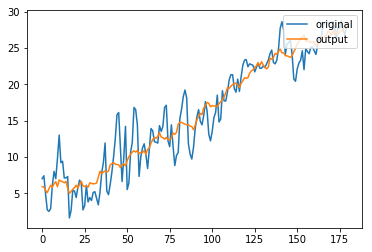

In [31]:
#入出力データをプロット
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(),label='output')
plt.legend(loc='upper right')
plt.show()

In [32]:
#異常スコアの計算
tmp = []
test_X = []

#6ヶ月ごとに分割しテストデータを作成
tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
tmp.append(test_x[540:720])
test_X = np.array(tmp, dtype="float32")

#データフレーム形式でテストデータを表示
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,7.900000,8.8,11.0,11.8,10.3,10.200000,9.100000,8.000000,7.3,8.0,...,22.4,24.900000,25.1,24.6,25.799999,23.4,23.799999,23.600000,23.4,21.299999
1,23.100000,25.0,26.0,27.6,28.1,28.799999,29.299999,28.299999,28.5,26.6,...,5.3,8.100000,9.6,9.9,11.400000,12.6,16.799999,11.300000,8.5,8.800000
2,10.600000,11.4,5.0,5.7,5.9,7.200000,9.100000,9.000000,10.3,9.3,...,21.1,22.799999,23.5,22.4,24.100000,24.6,24.400000,21.700001,22.9,24.700001
3,24.700001,23.6,25.0,24.4,23.9,24.400000,25.000000,26.200001,27.5,27.6,...,8.3,3.300000,4.2,5.4,7.200000,8.5,4.200000,5.400000,7.3,6.700000


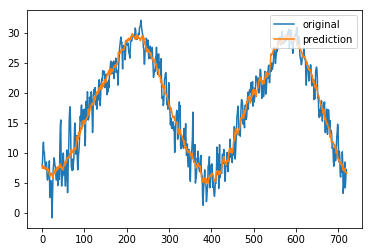

In [34]:
#モデルの適用
d = Variable(torch.from_numpy(test_X))
output = model(d)

#入出力データをプロット
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(),label='prediction')
plt.legend(loc='upper right')
plt.show()

In [35]:
#異常スコアの計算
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0,720):
    dist = (test[i]-pred[i])
    score = pow(dist,2)
    total_score.append(score)

#異常スコアを0ー1に変換
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score/max_score

#異常スコアの表示
total_score

array([1.82280077e-03, 1.04689391e-02, 1.76513947e-01, 2.86850933e-01,
       9.89662384e-02, 1.15711732e-01, 3.55518798e-02, 4.01454040e-03,
       1.82691254e-03, 6.53670406e-03, 1.68373874e-02, 1.41791422e-04,
       3.80832756e-02, 5.56988966e-02, 1.65291272e-02, 1.06812019e-02,
       6.89112185e-05, 6.65094863e-02, 1.87560697e-01, 7.57360045e-02,
       2.85928582e-02, 2.52481631e-02, 5.52054393e-02, 7.99872043e-01,
       3.57318744e-01, 2.03456259e-02, 1.62352043e-02, 3.92245069e-02,
       6.36261726e-02, 7.10930361e-02, 2.44842359e-02, 1.99075716e-02,
       6.27576692e-04, 3.88911633e-02, 1.65303572e-02, 3.36097318e-03,
       9.01162140e-03, 1.44088849e-01, 3.96064632e-02, 1.87788298e-04,
       6.22929068e-02, 1.72159235e-02, 2.06416112e-01, 7.40752011e-01,
       8.94638352e-01, 3.16292726e-02, 1.27963742e-01, 4.45235036e-02,
       2.10234690e-02, 7.66643426e-02, 1.16826836e-01, 3.16771596e-08,
       4.72703183e-02, 2.92056322e-04, 9.46075868e-02, 2.60628229e-01,
      

<function matplotlib.pyplot.show(*args, **kw)>

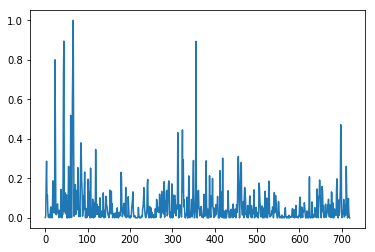

In [36]:
#異常スコアをプロット
plt.plot(total_score)
plt.show